# Exam #2 - CSC 459/559

### On the test, you are allowed to use:
- the textbook
- your personal notes
- any previous materials posted for the class on D2L
- any assignments you’ve turned in.

### Note: when you turn in your notebook, restart the kernel and re-run all cells one last time, and be sure to leave the output displayed.

## Part I) Forests

In [1]:
# import the necessary modules for your code
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib qt

In [2]:
# all problems will use the moons dataset

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.25, random_state=3)

In [3]:
# P2) (5 pts) Split the dataset into 50% training, 25% validation, and 25% test fractions


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1/2, random_state=3)
# print the shape of X_train (you should have 500 samples left in it)
print(X_train.shape)

(500, 2)


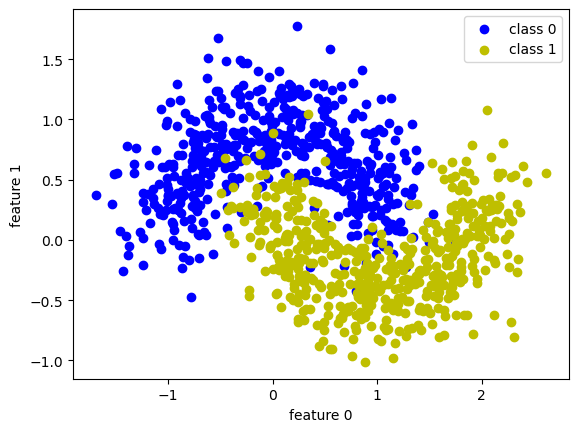

In [4]:
# P3) (10 pts) Plot the training data - use a different marker color for the two classes

plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='b')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='y')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(('class 0','class 1'))

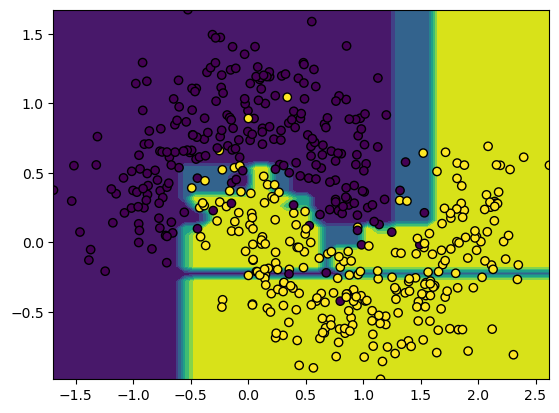

test accuracy: 0.924
train accuracy: 0.996


In [5]:
# P4) (10 pts) Create a random forest with 2 trees, train it, and print the resulting accuracy of the
# model on the training and validation data

import copy 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def getAccuracyForNTrees(num_trees, X_train, y_train, X_test, y_test, show_plot = True):
    forest = [] 
    X_train_orig = copy.deepcopy(X_train)
    y_train_orig = copy.deepcopy(y_train)

    # import the module to sample from X with replacement
    from sklearn.utils import resample

    # create the grid of points we'll use to display decision boundaries
    feature_1, feature_2 = np.meshgrid(
        np.linspace(X_train[:, 0].min(), X_train[:, 0].max()),
        np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
    )
    grid = np.vstack([feature_1.flatten(), feature_2.flatten()]).T
    y_pred_probs = np.zeros((feature_1.shape[0],feature_1.shape[1],2))

    for n in range(num_trees):
        X_train, y_train = resample(X_train_orig, y_train_orig, replace = True)
        tree = DecisionTreeClassifier()
        tree.fit(X_train, y_train)
        forest.append(tree)
        tree_probs_grid = tree.predict_proba(grid)
        y_pred_probs += np.reshape(tree_probs_grid, (feature_1.shape[0],feature_1.shape[1],2))
        
    y_pred_probs += np.reshape(tree_probs_grid, (feature_1.shape[0], feature_1.shape[1], 2))

    if(show_plot):
        display = DecisionBoundaryDisplay(
            xx0=feature_1, xx1=feature_2, response=y_pred_probs[:,:,1]
        )
        display.plot()
        display.ax_.scatter(
            X_train_orig[:, 0], X_train_orig[:, 1], c=y_train_orig, edgecolor="black"
        )
        plt.show()

    # print accuracy for test data
    y_pred_probs = np.zeros((len(X_test), 2))

    for n in range(num_trees):
        y_pred_probs += forest[n].predict_proba(X_test)
        
    y_pred_probs /= num_trees

    y_pred = np.argmax(y_pred_probs,axis = 1)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')

    # print accuracy for training data
    y_pred_probs = np.zeros((len(X_train), 2))

    for n in range(num_trees):
        y_pred_probs += forest[n].predict_proba(X_train)
        
    y_pred_probs /= num_trees

    y_pred = np.argmax(y_pred_probs,axis = 1)
    return accuracy_score(y_train, y_pred)

score = getAccuracyForNTrees(2, X_train, y_train, X_test, y_test)

print(f'train accuracy: {score}')


test accuracy: 0.92
test accuracy: 0.944
test accuracy: 0.94
test accuracy: 0.94
test accuracy: 0.94
test accuracy: 0.94
test accuracy: 0.94
test accuracy: 0.94
test accuracy: 0.94
test accuracy: 0.94


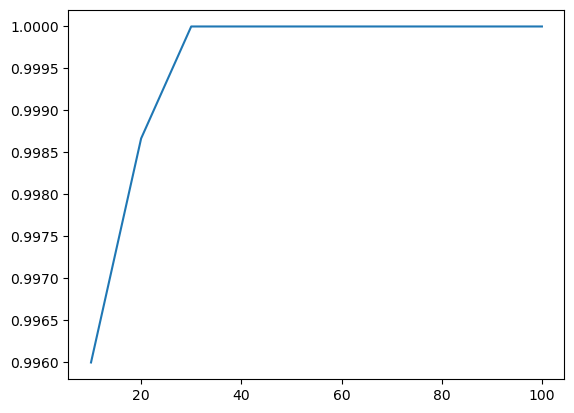

In [16]:
# P5) (25 pts) Experiment with the effects of different numbers of trees in the forest on accuracy on the validation data.

# Produce a plot showing AVERAGE validation accuracy as a function of # of trees for 10,20,30 .. 100 trees.
# For a given # of trees (e.g. 20), calculate the AVERAGE validation accuracy by calculating the accuracy 10 times 
# and averaging the results over that

test_values = [x * 10 for x in range (1, 11)]
results = [getAccuracyForNTrees(x, X_train, y_train, X_test, y_test, False) for x in test_values]
plt.plot(test_values, results)

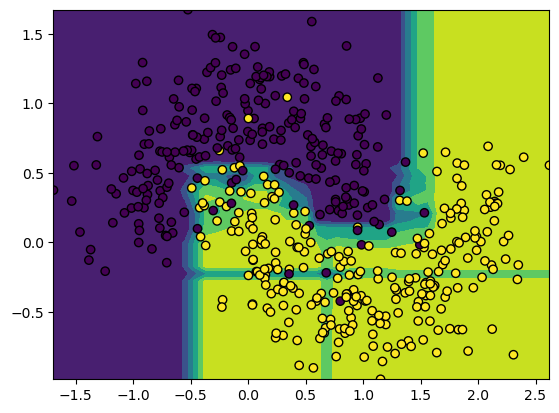

test accuracy: 0.95


In [7]:
# P6) (10 pts) Based on your plot, what's the minimum number of trees you would have in your forest?

# it appears that the ideal number of trees is 80
n = 80

# using that number of trees, retrain a forest and print the accuracy of the resulting model on the test set
result = getAccuracyForNTrees(80, X_train, y_train, X_test, y_test)

## Part II) Classifier Boundaries
note: use the same moons data as in the previous problems

In [8]:
# P7) (10 pts) Using the moons data, create a neural net classifier with 2 hidden layers with 50 nodes each

from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=1000, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=3)
mlp = MLPClassifier(random_state=3, hidden_layer_sizes=[2, 50]).fit(X_train, y_train)


c:\Users\NoahJohnson\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

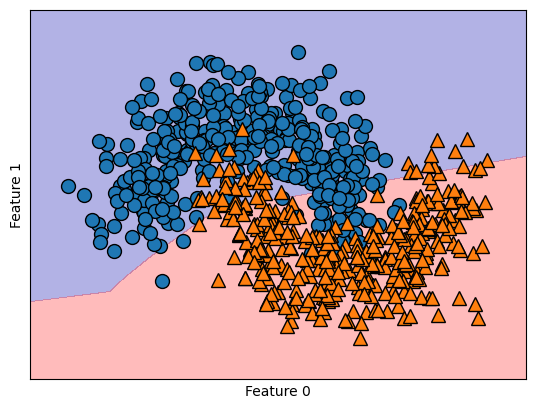

In [9]:
# P8) (20 pts) using meshgrid() and your own code, show the neural net's decision boundaries (so don't use the mglearn 
# function)

#sorry but I don't remember learning how to do this from scratch. :(

import mglearn
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [10]:
# P9) (5 pts) In your own words, explain why Naive Bayes is called "Naive".  
# (No more than 2 sentences - more is not better!)

# originally, they thought that this would be a perfect model and have perfect accuracy. This was a naive thought because it's only right some or most of the time.

In [11]:
# P10) (5 pts) In your own words, explain what the "k" in k-Nearest Neighbors is, and whether higher or lower 'k'
# corresponds to more or less regularization.

# (No more than 2 sentences - more is not better!)

# the k is how many neighbors are compared when evaluating each point. Higher values for k results in more regularization.
